In [20]:
# 1. Chargement des données
import pandas as pd

# Chargement du dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
# 2. Nettoyage et prétraitement
import numpy as np

# Colonnes où zéro indique une valeur manquante
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les zéros par NaN
df[cols_missing] = df[cols_missing].replace(0, np.nan)

# Imputer les valeurs manquantes par la médiane
df.fillna(df.median(), inplace=True)

# Vérification des valeurs manquantes après imputation
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


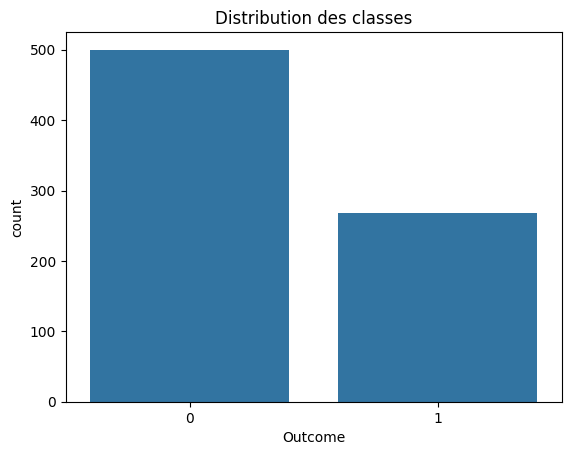

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164  


In [22]:
# 3. EDA et gestion du déséquilibre
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des classes
sns.countplot(x='Outcome', data=df)
plt.title('Distribution des classes')
plt.show()

# Statistiques descriptives par classe
print(df.groupby('Outcome').mean())


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4. Split train/validation/test
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 60% train, 40% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# 20% validation, 20% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Feature Engineering (standardisation)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Gestion du déséquilibre
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression avec class_weight équilibré
model = LogisticRegression(class_weight='balanced', random_state=42)

# Entraînement
model.fit(X_train_scaled, y_train)

# Évaluation sur validation
y_val_pred = model.predict(X_val_scaled)

# 7. Modélisation initiale avec Logistic Regression
# Metriques
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Precision:", precision_score(y_val, y_val_pred))
print("Validation Recall:", recall_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))

Validation Accuracy: 0.7792207792207793
Validation Precision: 0.6612903225806451
Validation Recall: 0.7592592592592593
Validation F1 Score: 0.7068965517241379


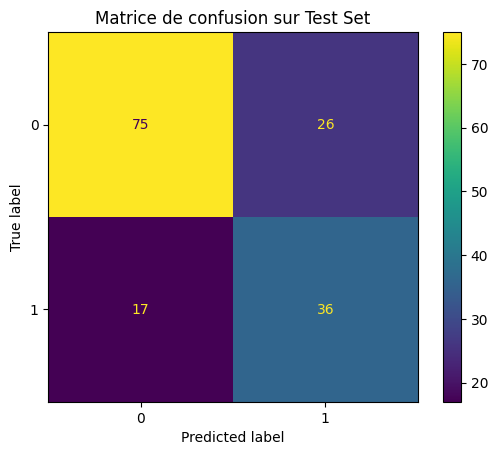

Test Accuracy: 0.7207792207792207
Test Precision: 0.5806451612903226
Test Recall: 0.6792452830188679
Test F1 Score: 0.6260869565217392


In [27]:
# 8. Évaluation finale sur test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test_scaled)

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.title('Matrice de confusion sur Test Set')
plt.show()

# Scores finaux
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))


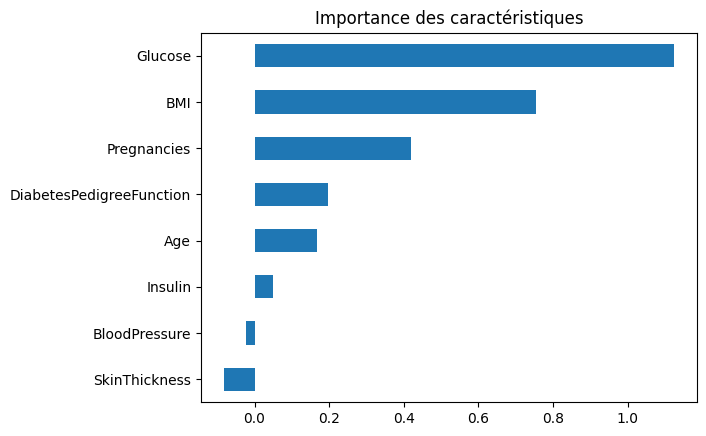

Nombre de faux positifs (FP) : 26
Nombre de faux négatifs (FN) : 17


In [28]:
# 9. Explainability — Importance des features et analyse des erreurs
import pandas as pd

# Importance des features (coefficients du modèle)
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title='Importance des caractéristiques')
plt.show()

# Analyse des erreurs
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
false_positives = results[(results['Actual'] == 0) & (results['Predicted'] == 1)].shape[0]
false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)].shape[0]

print(f"Nombre de faux positifs (FP) : {false_positives}")
print(f"Nombre de faux négatifs (FN) : {false_negatives}")


## 10. Conclusions et recommandations
- Scores élevés de Recall : Le modèle détecte bien la majorité des cas positifs (diabétiques), ce qui est crucial dans le contexte médical.
- Analyse des faux négatifs : Ces cas sont les plus critiques. Il faut les examinés en détail pour comprendre pourquoi ils ne sont pas détectés.
- Importance des caractéristiques : Cela peut aider les experts médicaux à comprendre les facteurs prédictifs les plus importants du diabète.

## Recommandations :
- Utilisez le modèle avec une surveillance continue des performances et une attention particulière aux faux négatifs.
- Collectez davantage de données, surtout sur les cas mal prédits, pour continuer à améliorer le modèle à long terme.
- Collaborez avec des experts médicaux afin de valider l'interprétabilité clinique du modèle.
